In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines

print("Number of accelerators: ", strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.123.105.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.123.105.42:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8


In [ ]:
 TEST_URL = 'gs://kds-c9419c2c09a89876d011bc2dbce1997df332b76213148a8faa8297b5/test2.tfrecord'
 TRAIN_URL = 'gs://kds-c9419c2c09a89876d011bc2dbce1997df332b76213148a8faa8297b5/train2.tfrecord'

In [ ]:
train = tf.data.TFRecordDataset(TRAIN_URL, num_parallel_reads=tf.data.AUTOTUNE)
test = tf.data.TFRecordDataset(TEST_URL, num_parallel_reads=tf.data.AUTOTUNE)

In [ ]:
def parse_tfrecord_fn(example, N_CLASSES=21):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "path": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64),

    }
    example = tf.io.parse_single_example(example, feature_description)
    decoded = tf.io.decode_jpeg(example["image"], channels=3)
    image = tf.image.resize_with_crop_or_pad(decoded, 600, 600)#, preserve_aspect_ratio=True)
    image = tf.keras.preprocessing.image.smart_resize(decoded, (600,600))
    example["label"] = tf.one_hot(example["label"], N_CLASSES)

    return image, example['label']

In [ ]:
trainRW = train.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)
testRW = test.map(parse_tfrecord_fn, num_parallel_calls=tf.data.AUTOTUNE)

(<tf.Tensor: shape=(600, 600, 3), dtype=float32, numpy=
array([[[161.41049 , 161.41049 ,  99.410484],
        [171.8998  , 171.8998  , 109.8998  ],
        [196.80305 , 196.80305 , 134.80305 ],
        ...,
        [208.1609  , 211.54012 , 163.40248 ],
        [204.1551  , 207.1551  , 160.1551  ],
        [198.02997 , 201.02997 , 154.02997 ]],

       [[193.38454 , 193.61205 , 132.06705 ],
        [188.88219 , 189.1097  , 127.56469 ],
        [207.23091 , 207.45842 , 145.91342 ],
        ...,
        [198.25925 , 201.55219 , 153.67337 ],
        [193.45113 , 196.45113 , 149.45113 ],
        [193.15894 , 196.15894 , 149.15894 ]],

       [[204.93413 , 205.93413 , 145.93413 ],
        [206.9413  , 207.9413  , 147.9413  ],
        [200.33208 , 201.33208 , 141.33208 ],
        ...,
        [199.57457 , 202.57457 , 155.57457 ],
        [196.52946 , 199.52946 , 152.52946 ],
        [191.27724 , 194.27724 , 147.27724 ]],

       ...,

       [[141.97476 , 143.21634 , 119.21634 ],
        [142

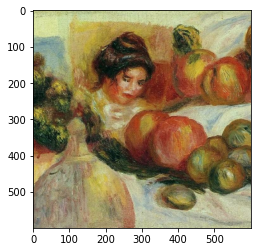

In [ ]:
for i in trainRW:
    print(i)#[0])
    plt.imshow(tf.divide(i[0], 255.))
    N_GENRES = i[1].numpy().shape[0]
    break

In [ ]:
N_GENRES

21

In [ ]:
# def connect_to_tpu(tpu_address: str = None):
#     if tpu_address is not None:  # When using GCP
#         cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
#             tpu=tpu_address)
#         if tpu_address not in ("", "local"):
#             tf.config.experimental_connect_to_cluster(cluster_resolver)
#         tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
#         strategy = tf.distribute.experimental.TPUStrategy(cluster_resolver)
#         print("Running on TPU ", cluster_resolver.master())
#         print("REPLICAS: ", strategy.num_replicas_in_sync)
#         return cluster_resolver, strategy
#     else:                           # When using Colab or Kaggle
#         try:
#             cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#             strategy = tf.distribute.experimental.TPUStrategy(cluster_resolver)
#             print("Running on TPU ", cluster_resolver.master())
#             print("REPLICAS: ", strategy.num_replicas_in_sync)
#             return cluster_resolver, strategy
#         except:
#             print("WARNING: No TPU detected.")
#             mirrored_strategy = tf.distribute.MirroredStrategy()
#             return None, mirrored_strategy

# connect_to_tpu()

In [ ]:
lenTrain = sum(1 for _ in trainRW)
lenTest = sum(1 for _ in testRW)

In [ ]:
BATCH_SIZE = 64 * strategy.num_replicas_in_sync
TRAIN_STEPS = tf.math.ceil(lenTrain / BATCH_SIZE)
TEST_STEPS = tf.math.ceil(lenTest / BATCH_SIZE)

In [ ]:
# from google.colab import auth 
# auth.authenticate_user()

In [ ]:
# trainRW.take(10)

In [ ]:
# .cache() and .shard() done automatically on TPU
t = trainRW.repeat().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
te = testRW.repeat().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
#post done with 64 batch size - 32 worked also

# train .interleave(random augment func) .cache() ...
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(600,600,3)))
  model.add(tf.keras.layers.Rescaling(1/255.))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(tf.keras.layers.GlobalMaxPool2D())
  model.add(tf.keras.layers.Dense(21, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

  model.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=TEST_STEPS, epochs=10)

Epoch 1/10
13/13 [==============================] - 43s 3s/step - loss: 2.9537 - accuracy: 0.0729 - val_loss: 2.8535 - val_accuracy: 0.2046
Epoch 2/10
13/13 [==============================] - 34s 3s/step - loss: 2.8081 - accuracy: 0.2013 - val_loss: 2.7534 - val_accuracy: 0.2061
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 2.7249 - accuracy: 0.2031 - val_loss: 2.6826 - val_accuracy: 0.2041
Epoch 4/10
13/13 [==============================] - 34s 3s/step - loss: 2.6861 - accuracy: 0.2036 - val_loss: 2.6553 - val_accuracy: 0.2036
Epoch 5/10
13/13 [==============================] - 31s 2s/step - loss: 2.6623 - accuracy: 0.2031 - val_loss: 2.6567 - val_accuracy: 0.1992
Epoch 6/10
13/13 [==============================] - 32s 3s/step - loss: 2.6538 - accuracy: 0.2054 - val_loss: 2.6367 - val_accuracy: 0.2041
Epoch 7/10
13/13 [==============================] - 31s 2s/step - loss: 2.6388 - accuracy: 0.2087 - val_loss: 2.6191 - val_accuracy: 0.2056
Epoch 8/10
13/13 [==

In [ ]:

# train .interleave(random augment func) .cache() ...
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(600,600,3)))
  model.add(tf.keras.layers.Rescaling(1/255.))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
  model.add(tf.keras.layers.GlobalMaxPool2D())
  model.add(tf.keras.layers.Dense(21, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

  model.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=TEST_STEPS, epochs=10)

Epoch 1/10
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


102/102 [==============================] - 58s 387ms/step - loss: 2.7167 - accuracy: 0.1955 - val_loss: 2.6466 - val_accuracy: 0.2031
Epoch 2/10
102/102 [==============================] - 31s 302ms/step - loss: 2.6290 - accuracy: 0.2056 - val_loss: 2.5998 - val_accuracy: 0.2013
Epoch 3/10
102/102 [==============================] - 31s 307ms/step - loss: 2.5647 - accuracy: 0.2201 - val_loss: 2.5394 - val_accuracy: 0.2362
Epoch 4/10
102/102 [==============================] - 31s 305ms/step - loss: 2.4957 - accuracy: 0.2489 - val_loss: 2.4798 - val_accuracy: 0.2572
Epoch 5/10
102/102 [==============================] - 32s 319ms/step - loss: 2.4299 - accuracy: 0.2578 - val_loss: 2.4260 - val_accuracy: 0.2530
Epoch 6/10
102/102 [==============================] - 31s 306ms/step - loss: 2.3766 - accuracy: 0.2661 - val_loss: 2.3771 - val_accuracy: 0.2638
Epoch 7/10
102/102 [==============================] - 32s 310ms/step - loss: 2.3333 - accuracy: 0.2759 - val_loss: 2.3404 - val_accuracy: 0.2

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
# With mixed precision, batch_size*=2
policy = tf.keras.mixed_precision.Policy('mixed_bfloat16')
tf.keras.mixed_precision.set_global_policy(policy)

In [ ]:
# Setup checkpoint path
checkpoint_path = "/content/mdl0/" # note: remember saving directly to Colab is temporary

# for TPU, must save locally
save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         options=tf.train.CheckpointOptions(experimental_io_device='/job:localhost'),
                                                         verbose=1)

In [ ]:
EFF_SHAPE = (600, 600, 3)

In [ ]:
# def modelgen(N_GENRES=N_GENRES, diagnostic=False):
#   model = EfficientNetB7(
#     include_top=False, weights='imagenet',
#     # input_shape=None,
#     pooling='max',
#     )
  
#   inputs = tf.keras.layers.Input(shape=EFF_SHAPE)
#   x = model(inputs, training=False)
#   outputs = tf.keras.layers.Dense(N_GENRES, activation='softmax')(x)

#   mlc = tf.keras.Model(inputs=inputs, outputs=outputs) 
  
#   if diagnostic==True:
#     return mlc, model
#   else:
#     return mlc


# with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
#   mlc = modelgen()
#   mlc.compile(optimizer='Adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
#               metrics='accuracy')


# mlc.summary()

In [ ]:
!pip install efficientnet
import efficientnet.tfkeras as efn 

In [ ]:
def modelgen2(N_GENRES=N_GENRES, diagnostic=False):

  model = efn.EfficientNetB7(weights='noisy-student', include_top=False)
  model.trainable = False
  
  inputs = tf.keras.layers.Input(shape=EFF_SHAPE)
  x = model(inputs)#, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  outputs = tf.keras.layers.Dense(N_GENRES, activation='softmax')(x)

  mlc = tf.keras.Model(inputs=inputs, outputs=outputs) 
  
  if diagnostic==True:
    return mlc, model
  else:
    return mlc


with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  mlc = modelgen2()
  mlc.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
              metrics='accuracy')


mlc.summary()

258080768/258068648 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 21)                53781     
                                                                 
Total params: 64,151,461
Trainable params: 53,781
Non-trainable params: 64,097,680
___________________________________________

In [ ]:
tf.random.set_seed(42)
history = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=10, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/10
102/102 [==============================] - ETA: 0s - loss: 247897.5938 - accuracy: 0.0706
Epoch 00001: saving model to /content/mdl0/
102/102 [==============================] - 147s 702ms/step - loss: 247897.5938 - accuracy: 0.0706 - val_loss: 271.4896 - val_accuracy: 0.0495
Epoch 2/10
102/102 [==============================] - ETA: 0s - loss: 217954.2812 - accuracy: 0.0757
Epoch 00002: saving model to /content/mdl0/
102/102 [==============================] - 46s 448ms/step - loss: 217954.2812 - accuracy: 0.0757 - val_loss: 190.2812 - val_accuracy: 0.0547
Epoch 3/10
102/102 [==============================] - ETA: 0s - loss: 379301.7812 - accuracy: 0.0723
Epoch 00003: saving model to /content/mdl0/
102/102 [==============================] - 48s 475ms/step - loss: 379301.7812 - accuracy: 0.0723 - val_loss: 160.6198 - val_accuracy: 0.0625
Epoch 4/10
102/102 [==============================] - ETA: 0s - loss: 276690.9375 - accuracy: 0.0846
Epoch 00004: saving model to /content/md

In [ ]:
def modelgen3(N_GENRES=N_GENRES, diagnostic=False):

  model = efn.EfficientNetB7(weights='noisy-student', include_top=False)
  model.trainable = False
  
  inputs = tf.keras.layers.Input(shape=EFF_SHAPE)
  x = tf.keras.layers.Rescaling(1/255.)(inputs)
  x = model(x)#, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  outputs = tf.keras.layers.Dense(N_GENRES, activation='softmax')(x)

  mlc = tf.keras.Model(inputs=inputs, outputs=outputs) 
  
  if diagnostic==True:
    return mlc, model
  else:
    return mlc


with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  mlc = modelgen3()
  mlc.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
              metrics='accuracy')


mlc.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 600, 600, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                                 
 global_average_pooling2d_2   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 21)                53781     
                                                                 
Total params: 64,151,461
Trainable params: 53,781
Non-train

In [ ]:
tf.random.set_seed(42)
history2 = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=10, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/10
102/102 [==============================] - ETA: 0s - loss: 2.2585 - accuracy: 0.3819
Epoch 00001: saving model to /content/mdl0/
102/102 [==============================] - 127s 694ms/step - loss: 2.2585 - accuracy: 0.3819 - val_loss: 1.8895 - val_accuracy: 0.5104
Epoch 2/10
102/102 [==============================] - ETA: 0s - loss: 1.8867 - accuracy: 0.5250
Epoch 00002: saving model to /content/mdl0/
102/102 [==============================] - 46s 449ms/step - loss: 1.8867 - accuracy: 0.5250 - val_loss: 1.7391 - val_accuracy: 0.5833
Epoch 3/10
102/102 [==============================] - ETA: 0s - loss: 1.7677 - accuracy: 0.5665
Epoch 00003: saving model to /content/mdl0/
102/102 [==============================] - 46s 448ms/step - loss: 1.7677 - accuracy: 0.5665 - val_loss: 1.6683 - val_accuracy: 0.6068
Epoch 4/10
102/102 [==============================] - ETA: 0s - loss: 1.6924 - accuracy: 0.5980
Epoch 00004: saving model to /content/mdl0/
102/102 [============================

In [ ]:
def modelgen3(N_GENRES=N_GENRES, diagnostic=False):

  model = efn.EfficientNetB7(weights='noisy-student', include_top=False)
  model.trainable = False
  
  inputs = tf.keras.layers.Input(shape=EFF_SHAPE)
  x = tf.keras.layers.Rescaling(1/255.)(inputs)
  x = model(x)#, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(200, activation='relu')(x)
  x = tf.keras.layers.Dense(100, activation='relu')(x)
  outputs = tf.keras.layers.Dense(N_GENRES, activation='softmax')(x)

  mlc = tf.keras.Model(inputs=inputs, outputs=outputs) 
  
  if diagnostic==True:
    return mlc, model
  else:
    return mlc


with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  mlc = modelgen3()
  mlc.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
              metrics='accuracy')


mlc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 200)               512200    
                                                                 
 dense_2 (Dense)             (None, 100)               20100 

In [ ]:
tf.random.set_seed(42)
history3 = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=10, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/10
102/102 [==============================] - ETA: 0s - loss: 2.1691 - accuracy: 0.4119
Epoch 00001: saving model to /content/mdl0/
102/102 [==============================] - 129s 693ms/step - loss: 2.1691 - accuracy: 0.4119 - val_loss: 1.7585 - val_accuracy: 0.5443
Epoch 2/10
102/102 [==============================] - ETA: 0s - loss: 1.7580 - accuracy: 0.5544
Epoch 00002: saving model to /content/mdl0/
102/102 [==============================] - 46s 450ms/step - loss: 1.7580 - accuracy: 0.5544 - val_loss: 1.6019 - val_accuracy: 0.6328
Epoch 3/10
102/102 [==============================] - ETA: 0s - loss: 1.6460 - accuracy: 0.6065
Epoch 00003: saving model to /content/mdl0/
102/102 [==============================] - 46s 447ms/step - loss: 1.6460 - accuracy: 0.6065 - val_loss: 1.5178 - val_accuracy: 0.6562
Epoch 4/10
102/102 [==============================] - ETA: 0s - loss: 1.5622 - accuracy: 0.6389
Epoch 00004: saving model to /content/mdl0/
102/102 [============================

In [ ]:

with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  mlc = modelgen3()
  mlc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
              metrics='accuracy')


mlc.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                                 
 global_average_pooling2d_3   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 200)               512200    
                                                                 
 dense_7 (Dense)             (None, 100)               2010

In [ ]:
tf.random.set_seed(42)
history4 = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=10, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/10
102/102 [==============================] - ETA: 0s - loss: 2.6658 - accuracy: 0.2632
Epoch 00001: saving model to /content/mdl0/
102/102 [==============================] - 127s 692ms/step - loss: 2.6658 - accuracy: 0.2632 - val_loss: 2.3405 - val_accuracy: 0.3594
Epoch 2/10
102/102 [==============================] - ETA: 0s - loss: 2.2426 - accuracy: 0.3980
Epoch 00002: saving model to /content/mdl0/
102/102 [==============================] - 49s 486ms/step - loss: 2.2426 - accuracy: 0.3980 - val_loss: 2.0378 - val_accuracy: 0.4557
Epoch 3/10
102/102 [==============================] - ETA: 0s - loss: 2.0319 - accuracy: 0.4617
Epoch 00003: saving model to /content/mdl0/
102/102 [==============================] - 48s 469ms/step - loss: 2.0319 - accuracy: 0.4617 - val_loss: 1.9118 - val_accuracy: 0.5365
Epoch 4/10
102/102 [==============================] - ETA: 0s - loss: 1.9119 - accuracy: 0.5112
Epoch 00004: saving model to /content/mdl0/
102/102 [============================

In [ ]:
from tensorflow.keras.callbacks import Callback


class LRFinder(Callback):
    """Callback that exponentially adjusts the learning rate after each training batch between start_lr and
    end_lr for a maximum number of batches: max_step. The loss and learning rate are recorded at each step allowing
    visually finding a good learning rate as per https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html via
    the plot method.
    """

    def __init__(self, start_lr: float = 1e-7, end_lr: float = 10, max_steps: int = 100, smoothing=0.9):
        super(LRFinder, self).__init__()
        self.start_lr, self.end_lr = start_lr, end_lr
        self.max_steps = max_steps
        self.smoothing = smoothing
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_begin(self, logs=None):
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_batch_begin(self, batch, logs=None):
        self.lr = self.exp_annealing(self.step)
        tf.keras.backend.set_value(self.model.optimizer.lr, self.lr)

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        step = self.step
        if loss:
            self.avg_loss = self.smoothing * self.avg_loss + (1 - self.smoothing) * loss
            smooth_loss = self.avg_loss / (1 - self.smoothing ** (self.step + 1))
            self.losses.append(smooth_loss)
            self.lrs.append(self.lr)

            if step == 0 or loss < self.best_loss:
                self.best_loss = loss

            if smooth_loss > 4 * self.best_loss or tf.math.is_nan(smooth_loss):
                self.model.stop_training = True

        if step == self.max_steps:
            self.model.stop_training = True

        self.step += 1

    def exp_annealing(self, step):
        return self.start_lr * (self.end_lr / self.start_lr) ** (step * 1. / self.max_steps)

    def plot(self):
        fig, ax = plt.subplots(1, 1)
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate (log scale)')
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
        ax.plot(self.lrs, self.losses)

In [ ]:
lr_finder = LRFinder()

In [ ]:
mlc.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), 
              metrics='accuracy')
tf.random.set_seed(42)
_ = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, epochs=30, callbacks=lr_finder, verbose=False,
                  #initial_epoch=2
                  )

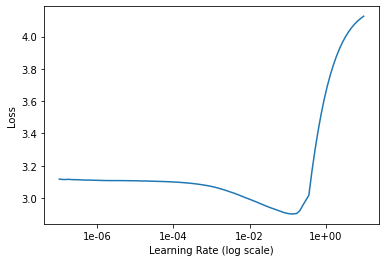

In [ ]:
lr_finder.plot()

In [ ]:
1e-02

0.01

In [ ]:

with strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  mlc = modelgen3()
  mlc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=.1), 
              metrics='accuracy')


mlc.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 efficientnet-b7 (Functional  (None, None, None, 2560)  64097680 
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 200)               512200    
                                                                 
 dense_5 (Dense)             (None, 100)               2010

In [ ]:
tf.random.set_seed(42)

historyFin = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=20, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/20
102/102 [==============================] - ETA: 0s - loss: 2.2860 - accuracy: 0.3775
Epoch 00001: saving model to /content/mdl0/
102/102 [==============================] - 129s 705ms/step - loss: 2.2860 - accuracy: 0.3775 - val_loss: 1.8039 - val_accuracy: 0.5234
Epoch 2/20
102/102 [==============================] - ETA: 0s - loss: 1.9028 - accuracy: 0.5139
Epoch 00002: saving model to /content/mdl0/
102/102 [==============================] - 46s 451ms/step - loss: 1.9028 - accuracy: 0.5139 - val_loss: 1.6744 - val_accuracy: 0.5859
Epoch 3/20
102/102 [==============================] - ETA: 0s - loss: 1.7799 - accuracy: 0.5542
Epoch 00003: saving model to /content/mdl0/
102/102 [==============================] - 46s 449ms/step - loss: 1.7799 - accuracy: 0.5542 - val_loss: 1.6209 - val_accuracy: 0.5990
Epoch 4/20
102/102 [==============================] - ETA: 0s - loss: 1.7116 - accuracy: 0.5846
Epoch 00004: saving model to /content/mdl0/
102/102 [============================

In [ ]:
# For timing's sake, at 64 batch size


tf.random.set_seed(42)

historyFin = mlc.fit(t, steps_per_epoch=TRAIN_STEPS, validation_data=te, validation_steps=int(.25*TEST_STEPS), epochs=5#, callbacks=checkpoint_callback,
                  #initial_epoch=2
                  )

Epoch 1/5
13/13 [==============================] - 130s 5s/step - loss: 2.7163 - accuracy: 0.1830 - val_loss: 2.4434 - val_accuracy: 0.3555
Epoch 2/5
13/13 [==============================] - 29s 2s/step - loss: 2.3250 - accuracy: 0.3619 - val_loss: 2.1855 - val_accuracy: 0.3770
Epoch 3/5
13/13 [==============================] - 29s 2s/step - loss: 2.1134 - accuracy: 0.4358 - val_loss: 2.0645 - val_accuracy: 0.4512
Epoch 4/5
13/13 [==============================] - 30s 2s/step - loss: 2.0026 - accuracy: 0.4784 - val_loss: 1.9219 - val_accuracy: 0.5020
Epoch 5/5
13/13 [==============================] - 30s 2s/step - loss: 1.9319 - accuracy: 0.5105 - val_loss: 1.8574 - val_accuracy: 0.5430
